In [313]:
import numpy as np
import pandas as pd
import os
import shap
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import lime
import lime.lime_tabular
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import datetime as dt
from sklearn.preprocessing import PolynomialFeatures
# for creating pipeline
from sklearn.pipeline import Pipeline
shap.initjs()
from sklearn.preprocessing import StandardScaler
#mean squared
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import scipy.sparse as sparse

data2012 = pd.read_csv('/home/peter/Documents/DSProject/finalData2012.csv')
data2013 = pd.read_csv('/home/peter/Documents/DSProject/finalData2013.csv')
data2014 = pd.read_csv('/home/peter/Documents/DSProject/finalData2014.csv')

data = pd.read_csv('/home/peter/Documents/DSProject/Data00-13.csv')
data14 = pd.read_csv('/home/peter/Documents/DSProject/Data14-14.csv')

In [314]:
Uta12 = data['State'] == 'California'
Utah12 = data[Uta12]
######################## Monthly Seperation
Utah12['Date Local'] =  pd.to_datetime(Utah12['Date Local'])
Utah12.set_index('Date Local', inplace=True)
Utah12.index = pd.to_datetime(Utah12.index)
UtahMonthly2012=Utah12.resample('1M').mean().reset_index()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [315]:
UtahMonthly2012

,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,2000-01-31,22.681607,38.098612,12.791819,36.078159,0.013111,0.022126,10.237400,18.768444,1.785449,3.710007,9.275749,7.029218,1.027905,2.008692,9.612856,12.529218
1,2000-02-29,17.639380,31.730354,12.206471,29.986133,0.021247,0.031840,10.816641,27.009245,1.258260,2.642604,8.600154,6.153313,0.670597,1.357704,9.071649,9.295609
2,2000-03-31,16.930087,32.416554,12.529172,30.729986,0.026984,0.040725,10.310719,35.219132,1.560809,3.573100,9.453528,6.883989,0.572631,1.121099,8.878223,8.291350
3,2000-04-30,15.240847,30.511173,11.041899,29.001397,0.031271,0.045223,10.241620,39.939944,1.449173,3.294902,9.238128,6.712291,0.533355,0.942109,7.982542,7.583659
4,2000-05-31,13.672839,26.661473,10.327195,25.263456,0.032277,0.046373,10.126062,43.550992,1.767104,3.982153,8.913598,7.204674,0.444159,0.706799,7.217422,6.588385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2013-08-31,8.527544,16.364055,9.722637,15.126866,0.026324,0.040280,10.141791,42.241294,0.471711,1.021580,9.294776,4.572761,0.254692,0.359824,5.286381,4.912127
164,2013-09-30,9.927804,20.423267,10.534653,18.961634,0.028215,0.043491,10.247525,43.669554,0.487105,1.062624,9.308787,4.635520,0.273574,0.443006,5.733911,5.263861
165,2013-10-31,13.124588,26.149762,12.270252,24.360109,0.026437,0.041062,10.007488,38.082369,0.566253,1.255242,9.361470,4.760722,0.354261,0.635329,7.372362,6.141933
166,2013-11-30,16.842725,29.657959,13.843537,27.717007,0.020494,0.033102,9.808163,29.934694,0.607568,1.261224,9.858503,4.757143,0.457672,0.808656,8.969388,7.156803


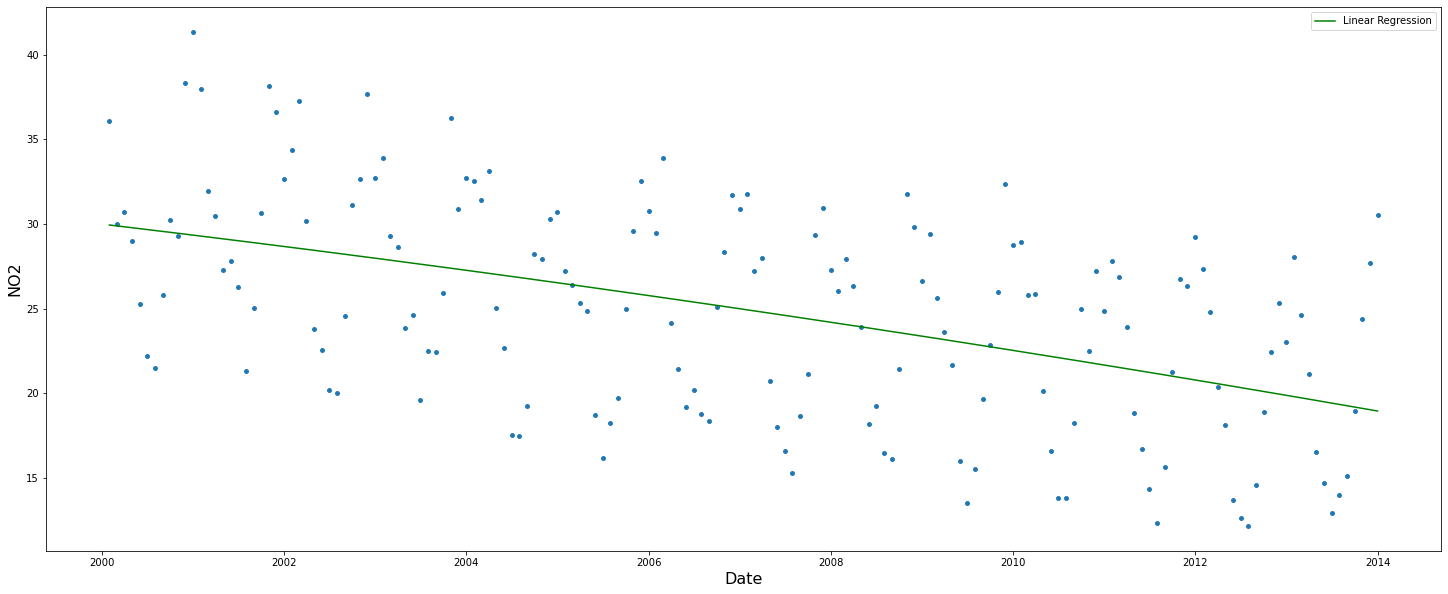

In [316]:
pd.DatetimeIndex(UtahMonthly2012['Date Local'])
date = UtahMonthly2012['Date Local']
N02 = UtahMonthly2012['NO2 AQI']
UtahMonthly2012 = pd.DataFrame({'time': date, 'NO2AQI': N02})
UtahMonthly2012.time = pd.to_datetime(UtahMonthly2012.time)
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(UtahMonthly2012.time.values.reshape(-1,1),UtahMonthly2012.NO2AQI.values.reshape(-1,1))
poly_pred=pipe.predict(UtahMonthly2012.time.values.reshape(-1,1))

#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(UtahMonthly2012.time.values,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
#plotting predictions
plt.figure(figsize=(25,10))
plt.scatter(UtahMonthly2012.time.values,UtahMonthly2012.NO2AQI.values,s=15)

plt.plot(x_poly,poly_pred,color='g',label='Linear Regression')
plt.xlabel('Date',fontsize=16)
plt.ylabel('NO2',fontsize=16)
#plt.xlim([datetime.date(2012,1,1),datetime.date(2012,3,1)])
plt.legend()
plt.show()

In [317]:
UtahMonthly2012['time'] = pd.to_datetime(UtahMonthly2012['time'])
UtahMonthly2012['time']=UtahMonthly2012['time'].map(dt.datetime.toordinal)

In [318]:
UtahMonthly2012

,time,NO2AQI
0,730150,36.078159
1,730179,29.986133
2,730210,30.729986
3,730240,29.001397
4,730271,25.263456
...,...,...
163,735111,15.126866
164,735141,18.961634
165,735172,24.360109
166,735202,27.717007


In [319]:
x = UtahMonthly2012.iloc[:,0:1]
y = UtahMonthly2012.iloc[:,1:2]

In [320]:
lin_regs = LinearRegression()

In [321]:
lin_regs.fit(x,y)

LinearRegression()

In [322]:
poly_regs = PolynomialFeatures(degree=10)

In [323]:
x_poly = poly_regs.fit_transform(x)

In [324]:
lin_reg_2 = LinearRegression()

In [325]:
lin_reg_2.fit(x_poly,y)

LinearRegression()

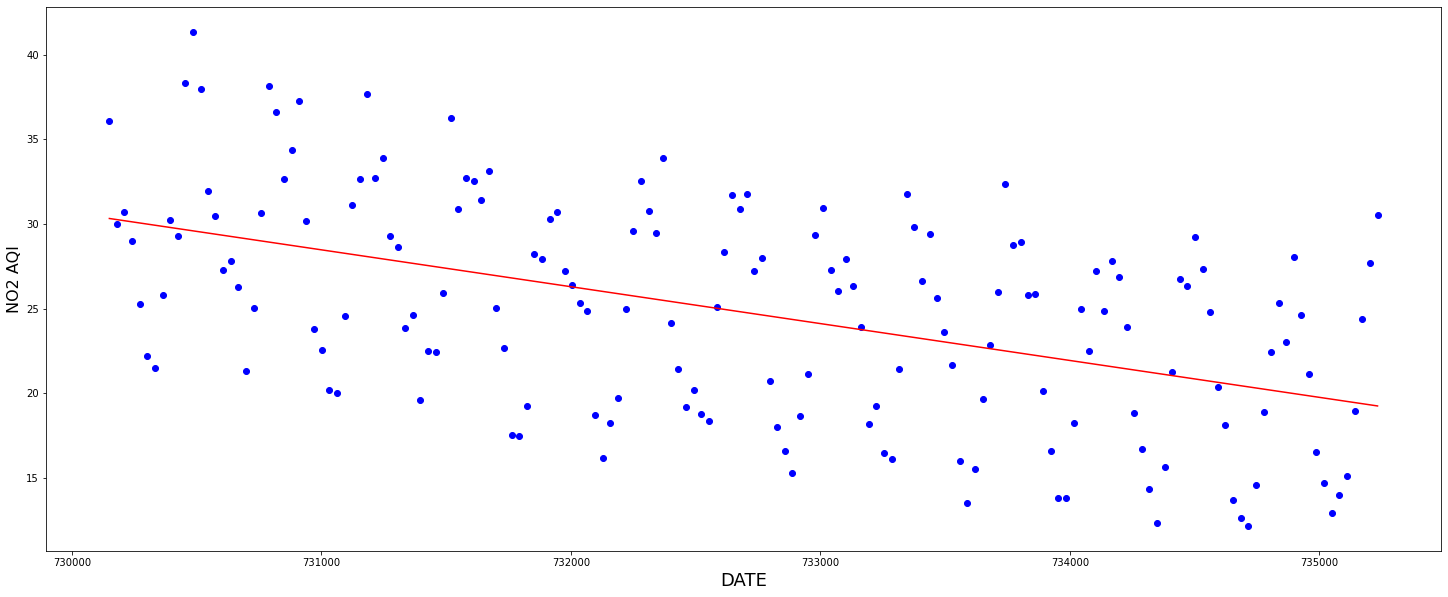

In [326]:
plt.figure(figsize=(25,10))
plt.scatter(x,y,color='blue')
plt.plot(x,lin_regs.predict(x),color="red")
plt.xlabel('DATE', fontsize=18)
plt.ylabel('NO2 AQI', fontsize=16)
plt.show()

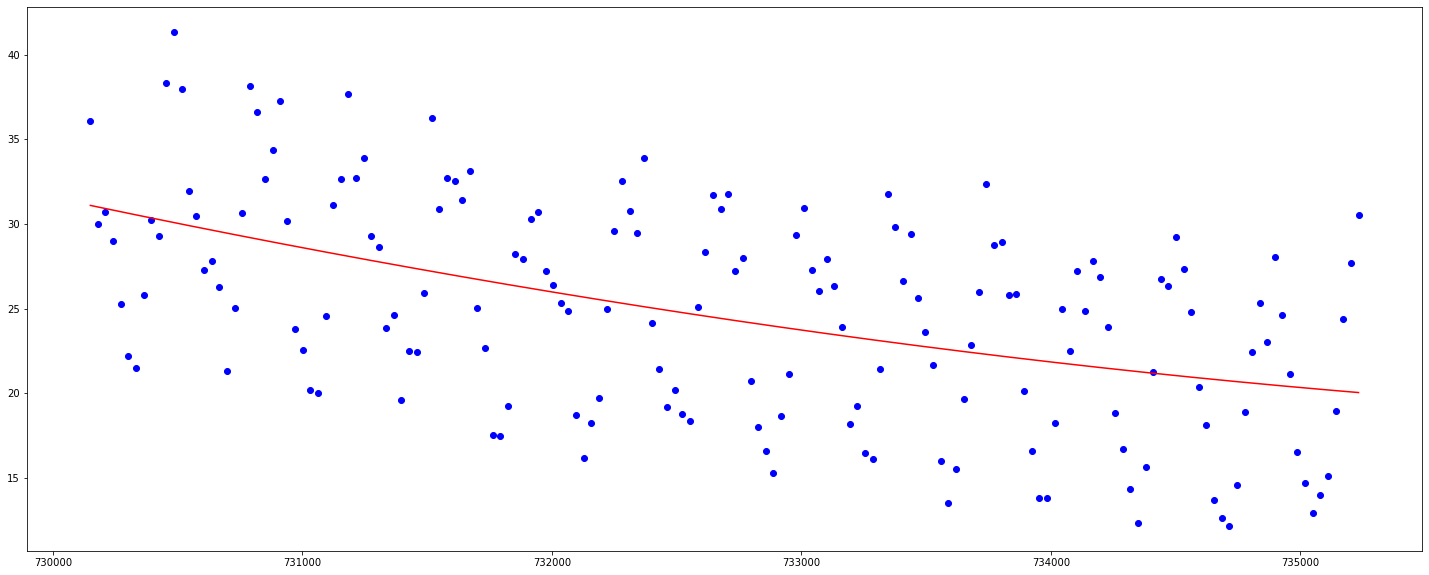

In [327]:
plt.figure(figsize=(25,10))
plt.scatter(x,y,color='blue')
plt.plot(x,lin_reg_2.predict(poly_regs.fit_transform(x)),color='red')
plt.show()

In [328]:
poly_pred = lin_reg_2.predict(poly_regs.fit_transform(x))

In [329]:
poly_pred

array([[31.10094896],
       [31.01156525],
       [30.91633803],
       [30.82449859],
       [30.72992454],
       [30.63871764],
       [30.54479766],
       [30.45121045],
       [30.36095922],
       [30.26802748],
       [30.17841103],
       [30.08613567],
       [29.99419426],
       [29.91143761],
       [29.8201324 ],
       [29.73209113],
       [29.6414446 ],
       [29.55404121],
       [29.46405429],
       [29.37440294],
       [29.2879633 ],
       [29.19897296],
       [29.11317345],
       [29.02484505],
       [28.93685339],
       [28.8576667 ],
       [28.77031662],
       [28.68610558],
       [28.59941974],
       [28.51585195],
       [28.42983128],
       [28.34414899],
       [28.26155308],
       [28.17653737],
       [28.09458698],
       [28.01023878],
       [27.92623016],
       [27.85064349],
       [27.76728184],
       [27.68693327],
       [27.60424144],
       [27.52454154],
       [27.44252046],
       [27.36084063],
       [27.28212075],
       [27

In [330]:
x

,time
0,730150
1,730179
2,730210
3,730240
4,730271
...,...
163,735111
164,735141
165,735172
166,735202


In [331]:
poly_pred = lin_reg_2.predict(poly_regs.fit_transform([[735414]]))

In [332]:
poly_pred

array([[19.82478049]])

In [333]:
Uta12 = data14['State'] == 'California'
Utah12 = data14[Uta12]
######################## Monthly Seperation
Utah12['Date Local'] =  pd.to_datetime(Utah12['Date Local'])
Utah12.set_index('Date Local', inplace=True)
Utah12.index = pd.to_datetime(Utah12.index)
UtahMonthly2012=Utah12.resample('1M').mean().reset_index()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [334]:
pd.DatetimeIndex(UtahMonthly2012['Date Local'])
date = UtahMonthly2012['Date Local']
N02 = UtahMonthly2012['NO2 AQI']
Odate = UtahMonthly2012['Date Local']
UtahMonthly2012 = pd.DataFrame({'time': date, 'NO2AQI': N02, 'OriginalDate' : Odate})
UtahMonthly2012.time = pd.to_datetime(UtahMonthly2012.time)

In [335]:
UtahMonthly2012['time'] = pd.to_datetime(UtahMonthly2012['time'])
UtahMonthly2012['time']=UtahMonthly2012['time'].map(dt.datetime.toordinal)

In [336]:
UtahMonthly2012

,time,NO2AQI,OriginalDate
0,735264,33.525081,2014-01-31
1,735292,24.286025,2014-02-28
2,735323,19.839437,2014-03-31
3,735353,18.182874,2014-04-30
4,735384,15.843840,2014-05-31
5,735414,11.833577,2014-06-30
6,735445,11.678014,2014-07-31
7,735476,12.786685,2014-08-31
8,735506,16.402507,2014-09-30
9,735537,23.714092,2014-10-31


In [337]:
x = UtahMonthly2012.iloc[:,0:1]

In [338]:
poly_pred = lin_reg_2.predict(poly_regs.fit_transform(x))

In [339]:
poly_pred

array([[20.002965  ],
       [19.96904179],
       [19.93183822],
       [19.89618946],
       [19.85971916],
       [19.82478049],
       [19.78904446],
       [19.75368195],
       [19.71981607],
       [19.68518933],
       [19.65203595],
       [19.61814596]])

In [340]:
UtahMonthly2012['Predictions'] =  poly_pred

In [341]:
UtahMonthly2012

,time,NO2AQI,OriginalDate,Predictions
0,735264,33.525081,2014-01-31,20.002965
1,735292,24.286025,2014-02-28,19.969042
2,735323,19.839437,2014-03-31,19.931838
3,735353,18.182874,2014-04-30,19.896189
4,735384,15.843840,2014-05-31,19.859719
5,735414,11.833577,2014-06-30,19.824780
6,735445,11.678014,2014-07-31,19.789044
7,735476,12.786685,2014-08-31,19.753682
8,735506,16.402507,2014-09-30,19.719816
9,735537,23.714092,2014-10-31,19.685189


In [343]:
x = UtahMonthly2012['time']
y = UtahMonthly2012['NO2AQI']
z = UtahMonthly2012['OriginalDate']
o = UtahMonthly2012['Predictions']

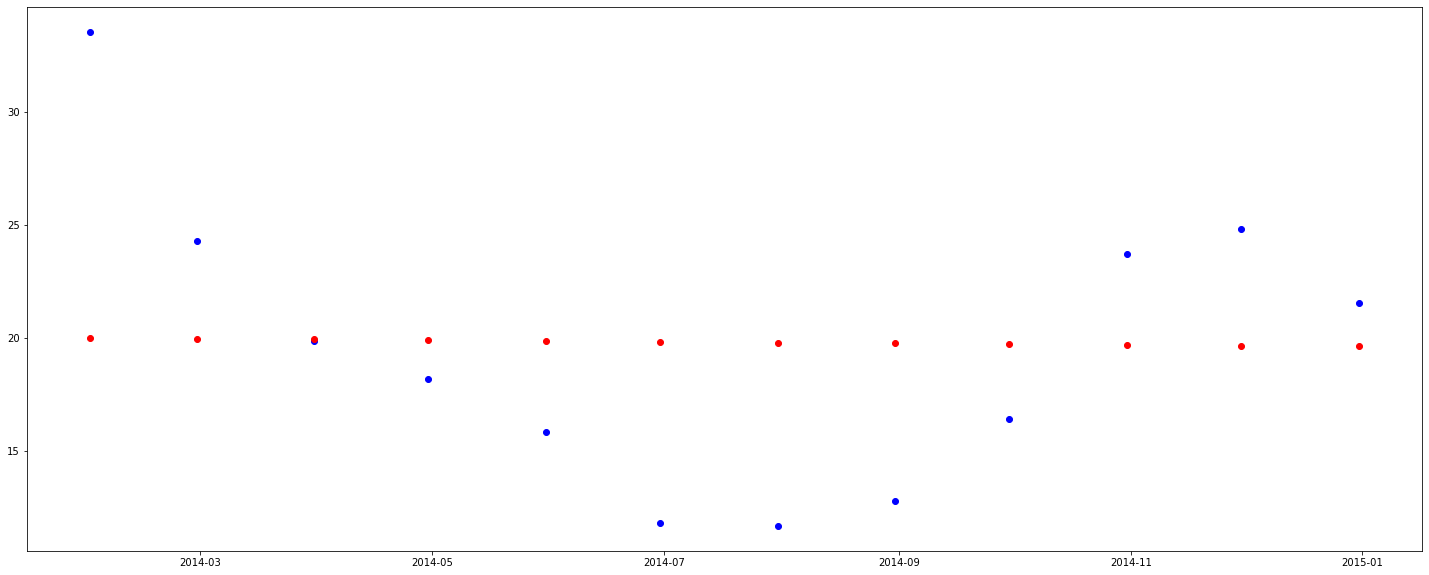

In [346]:
plt.figure(figsize=(25,10))
plt.scatter(z,y,color='blue')
plt.scatter(z,o,color='red')